## Complete tasks, using Pandas

Data downloaded from https://www.kaggle.com/datasets/kaggle/us-baby-names?select=NationalNames.csv

In [95]:
group_index = 6
variant = (group_index + 4) % 5 + 1

print('Variant number:', variant)

Variant number: 1


## Tasks list:


 [1](#1-show-first-8-rows-of-data),
 [2](#2-show-last-8-rows-of-data),
 [3](#3-get-names-of-columns), 
 [5](#5-find-the-number-of-unique-names-in-dataset),
 [10](#10-count-the-number-of-unique-names-for-each-year),
 [11](#11-find-a-year-with-the-highest-number-of-unique-names),
 [12](#12-find-the-most-popular-name-of-the-year-with-most-unique-names),
 [13](#13-find-a-year-when-name-jacob-was-the-most-popular-among-female-names),
 [14](#14-find-a-year-with-the-highest-number-of-gender-neutral-names-male-and-female-names-at-once),
 [15](#15-find-the-number-of-births-for-each-year),
 [16](#16-find-a-year-when-the-most-children-were-born),
 [17](#17-find-the-number-of-girls-and-boys-who-were-born-each-year),
 [18](#18-count-the-number-of-years-when-there-were-born-more-girls-than-boys),
 [21](#21-count-how-many-times-the-name-barbara-was-given-to-boys),
 [22](#22-count-for-how-many-years-were-the-observations-made),
 [23](#23-find-the-most-popular-gender-neutral-names-given-each-year),
 [24](#24-find-the-most-popular-among-unpopular-names-unpopular-name-that-was-given-to-children-most-times),
 [26](#26-plot-graphs-of-distribution-of-female-names-john-and-male-names-mary-by-years)

In [96]:
import pandas as pd

In [97]:
df = pd.read_csv('./NationalNames.csv')
df

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


### [1](#tasks-list). Show first 8 rows of data.

In [98]:
df[:8]

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


### [2](#tasks-list). Show last 8 rows of data.

In [99]:
df[-8:]

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


### [3](#tasks-list). Get names of columns

In [100]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

### [5](#tasks-list). Find the number of unique names in dataset

In [101]:
df['Name'].nunique()

93889

### [10](#tasks-list). Count the number of unique names for each year

In [102]:
df.groupby('Year')['Name'].nunique()

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

### [11](#tasks-list). Find a year with the highest number of unique names

In [103]:
df.groupby('Year')['Name'].nunique().sort_values(ascending=False).head(1)

Year
2008    32488
Name: Name, dtype: int64

### [12](#tasks-list). Find the most popular name of the year with most unique names

In [104]:
most_unique_year = df.groupby('Year')['Name'].nunique().idxmax()
year_df = df[df['Year'] == most_unique_year]
year_df.sort_values('Count', ascending=False).iloc[0]['Name']

'Jacob'

### [13](#tasks-list). Find a year when name 'Jacob' was the most popular among female names

In [105]:
female_df = df[df['Gender'] == 'F']
jacob_df = female_df[female_df['Name'] == 'Jacob']
jacob_df.sort_values('Count', ascending=False).head(1)

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


### [14](#tasks-list). Find a year with the highest number of gender-neutral names (male and female names at once)

In [106]:
male_names = df[df['Gender'] == 'M'].groupby(['Year', 'Name'])['Count'].sum()
female_names = df[df['Gender'] == 'F'].groupby(['Year', 'Name'])['Count'].sum()
gender_neutral_names = male_names.index.intersection(female_names.index)
male_names = male_names.loc[gender_neutral_names]
gender_neutral_counts = male_names.groupby(level=0).count()
gender_neutral_counts.sort_values(ascending=False).head(1)

Year
2008    2557
Name: Count, dtype: int64

### [15](#tasks-list). Find the number of births for each year

In [107]:
df.groupby('Year')['Count'].sum().head()

Year
1880    201484
1881    192699
1882    221538
1883    216950
1884    243467
Name: Count, dtype: int64

### [16](#tasks-list). Find a year when the most children were born

In [108]:
df.groupby('Year')['Count'].sum().idxmax()

1957

### [17](#tasks-list). Find the number of girls and boys who were born each year

In [109]:
df.groupby(['Year', 'Gender'])['Count'].sum().unstack().head()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


### [18](#tasks-list). Count the number of years when there were born more girls than boys

In [110]:
boys_girls_count = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
boys_girls_count[boys_girls_count['F'] > boys_girls_count['M']].shape[0]

54

### [21](#tasks-list). Count how many times the name 'Barbara' was given to boys

In [111]:
df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()

4139

### [22](#tasks-list). Count for how many years were the observations made

In [112]:
num_of_years = len(df['Year'].unique())
f"The observations were made for {num_of_years} years."

'The observations were made for 135 years.'

### [23](#tasks-list). Find the most popular gender-neutral names (given each year)

In [113]:
num_of_years = len(df['Year'].unique())
male_names = df[df['Gender'] == 'M'].groupby(['Name'])['Count'].sum()
female_names = df[df['Gender'] == 'F'].groupby(['Name'])['Count'].sum()
gender_neutral_names = male_names.index.intersection(female_names.index)
popular_gender_neutral_names = df[df['Name'].isin(gender_neutral_names)].groupby('Name').filter(lambda x: x['Year'].nunique() == num_of_years)['Name'].unique()
pd.DataFrame(data=popular_gender_neutral_names)

,0
0,Mary
1,Anna
2,Emma
3,Elizabeth
4,Minnie
...,...
818,Noble
819,Rupert
820,Thad
821,Kelly


### [24](#tasks-list). Find the most popular among unpopular names (unpopular name that was given to children most times)

In [114]:
years_threshold = 10
unpopular_names = df.groupby('Name').filter(lambda x: x['Year'].nunique() < years_threshold).groupby('Name')['Count'].sum()
unpopular_name = unpopular_names.sort_values(ascending=False).head(1)
f"The most popular name among unpopular ones (given in less than {years_threshold} years) is {unpopular_name.index[0]}, it was given {unpopular_name.values[0]} times."

'The most popular name among unpopular ones (given in less than 10 years) is Cataleya, it was given 2037 times.'

### [26](#tasks-list). Plot graphs of distribution of female names John and male names Mary by years

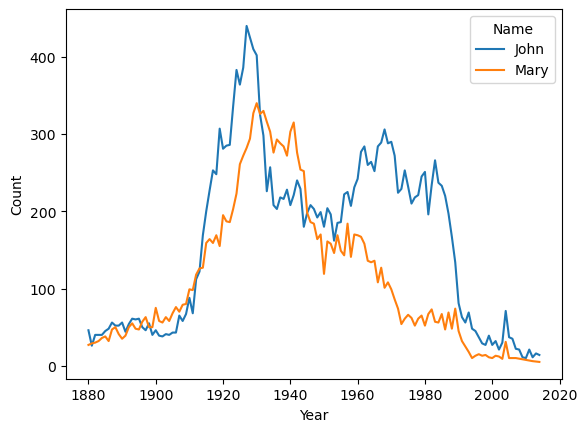

In [115]:
import matplotlib.pyplot as plt

john_data = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]
mary_data = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]

plt.plot(john_data['Year'], john_data['Count'], label='John')
plt.plot(mary_data['Year'], mary_data['Count'], label='Mary')

plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Name')

plt.show()